In [203]:
import numpy as np
import pandas as pd 
import seaborn as sns
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC
from sklearn import preprocessing
import matplotlib.pyplot as plt 
import matplotlib.dates as dates
import datetime
from scipy import stats
%matplotlib inline

In [293]:
df_2016 = pd.read_csv('2016_df.csv', parse_dates='Created_Date', index_col='Created_Date')
df_2015 = pd.read_csv('2015_df.csv', parse_dates='Created_Date', index_col='Created_Date')
df_2014 = pd.read_csv('2014_df.csv', parse_dates='Created_Date', index_col='Created_Date')
#df_2016 = pd.read_csv('2016_df.csv', parse_dates='Created_Date')
#df_2015 = pd.read_csv('2015_df.csv', parse_dates='Created_Date')
#df_2014 = pd.read_csv('2014_df.csv', parse_dates='Created_Date')

In [294]:
df_2016 = df_2016.replace(to_replace="-", value=0)

In [295]:
df_2014.head()

,Building_Conditions,General_Request,Living_Conditions,Parking_Enforcement,Signal_Sign_Repair,Street_Sidewalk_Repair,Max_TempF,Weather
Created_Date,,,,,,,,
2014-01-01,1512,388,155,336,139,303,34,10
2014-01-02,3236,921,263,360,315,320,33,9
2014-01-03,3712,624,235,306,240,516,19,4
2014-01-04,4347,489,154,375,130,1188,31,10
2014-01-05,2529,500,169,361,206,1022,49,1


In [296]:
df_2016.head()

,Building_Conditions,General_Request,Living_Conditions,Parking_Enforcement,Signal_Sign_Repair,Street_Sidewalk_Repair,Max_TempF,Weather
Created_Date,,,,,,,,
2016-01-01,0,0,0,0,0,0,42,0
2016-01-02,0,0,0,0,0,0,40,0
2016-01-03,0,0,0,0,0,0,45,0
2016-01-04,0,0,0,0,0,0,36,0
2016-01-05,0,0,0,0,0,0,29,0


In [297]:
df_2015.head()

,Building_Conditions,General_Request,Living_Conditions,Parking_Enforcement,Signal_Sign_Repair,Street_Sidewalk_Repair,Max_TempF,Weather
Created_Date,,,,,,,,
2015-01-01,1607,369,273,438,112,264,40,8
2015-01-02,1935,604,581,588,282,499,45,8
2015-01-03,1527,465,369,511,156,322,47,4
2015-01-04,1230,395,403,486,165,357,55,1
2015-01-05,2797,748,705,625,537,734,51,8


In [320]:
#df.ix[:,'b':]
train_years = pd.concat([df_2014, df_2015])
X = (train_years.index - train_years.index[0]).days.reshape(-1,1)
y = train_years['Max_TempF'].values

In [321]:
X_train, X_test, y_train, y_test = train_test_split(train_years, train_years, test_size=0.5)

In [322]:
#X = train_years[:365]
#y = train_years[365:]
#X_new = df_2016.Max_TempF.values

In [323]:
lr = LinearRegression()
clf = LinearSVC()
svr = SVR()

In [324]:
svr = svr.fit(X, y)

In [325]:
clf = clf.fit(X,y)

In [331]:
svr.predict(df_2016.index.day)

/usr/local/lib/python2.7/dist-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: X.shape[1] = 366 should be equal to 1, the number of features at training time

KeyError: '[(0,) (1,) (2,) (3,) (4,) (5,) (6,) (7,) (8,) (9,) (10,) (11,) (12,) (13,)\n (14,) (15,) (16,) (17,) (18,) (19,) (20,) (21,) (22,) (23,) (24,) (25,)\n (26,) (27,) (28,) (29,) (30,) (31,) (32,) (33,) (34,) (35,) (36,) (37,)\n (38,) (39,) (40,) (41,) (42,) (43,) (44,) (45,) (46,) (47,) (48,) (49,)\n (50,) (51,) (52,) (53,) (54,) (55,) (56,) (57,) (58,) (59,) (60,) (61,)\n (62,) (63,) (64,) (65,) (66,) (67,) (68,) (69,) (70,) (71,) (72,) (73,)\n (74,) (75,) (76,) (77,) (78,) (79,) (80,) (81,) (82,) (83,) (84,) (85,)\n (86,) (87,) (88,) (89,) (90,) (91,) (92,) (93,) (94,) (95,) (96,) (97,)\n (98,) (99,) (100,) (101,) (102,) (103,) (104,) (105,) (106,) (107,) (108,)\n (109,) (110,) (111,) (112,) (113,) (114,) (115,) (116,) (117,) (118,)\n (119,) (120,) (121,) (122,) (123,) (124,) (125,) (126,) (127,) (128,)\n (129,) (130,) (131,) (132,) (133,) (134,) (135,) (136,) (137,) (138,)\n (139,) (140,) (141,) (142,) (143,) (144,) (145,) (146,) (147,) (148,)\n (149,) (150,) (151,) (152,) (153,) (154,) (155,) (156,) (157,) (158,)\n (159,) (160,) (161,) (162,) (163,) (164,) (165,) (166,) (167,) (168,)\n (169,) (170,) (171,) (172,) (173,) (174,) (175,) (176,) (177,) (178,)\n (179,) (180,) (181,) (182,) (183,) (184,) (185,) (186,) (187,) (188,)\n (189,) (190,) (191,) (192,) (193,) (194,) (195,) (196,) (197,) (198,)\n (199,) (200,) (201,) (202,) (203,) (204,) (205,) (206,) (207,) (208,)\n (209,) (210,) (211,) (212,) (213,) (214,) (215,) (216,) (217,) (218,)\n (219,) (220,) (221,) (222,) (223,) (224,) (225,) (226,) (227,) (228,)\n (229,) (230,) (231,) (232,) (233,) (234,) (235,) (236,) (237,) (238,)\n (239,) (240,) (241,) (242,) (243,) (244,) (245,) (246,) (247,) (248,)\n (249,) (250,) (251,) (252,) (253,) (254,) (255,) (256,) (257,) (258,)\n (259,) (260,) (261,) (262,) (263,) (264,) (265,) (266,) (267,) (268,)\n (269,) (270,) (271,) (272,) (273,) (274,) (275,) (276,) (277,) (278,)\n (279,) (280,) (281,) (282,) (283,) (284,) (285,) (286,) (287,) (288,)\n (289,) (290,) (291,) (292,) (293,) (294,) (295,) (296,) (297,) (298,)\n (299,) (300,) (301,) (302,) (303,) (304,) (305,) (306,) (307,) (308,)\n (309,) (310,) (311,) (312,) (313,) (314,) (315,) (316,) (317,) (318,)\n (319,) (320,) (321,) (322,) (323,) (324,) (325,) (326,) (327,) (328,)\n (329,) (330,) (331,) (332,) (333,) (334,) (335,) (336,) (337,) (338,)\n (339,) (340,) (341,) (342,) (343,) (344,) (345,) (346,) (347,) (348,)\n (349,) (350,) (351,) (352,) (353,) (354,) (355,) (356,) (357,) (358,)\n (359,) (360,) (361,) (362,) (363,) (364,)] not in index'

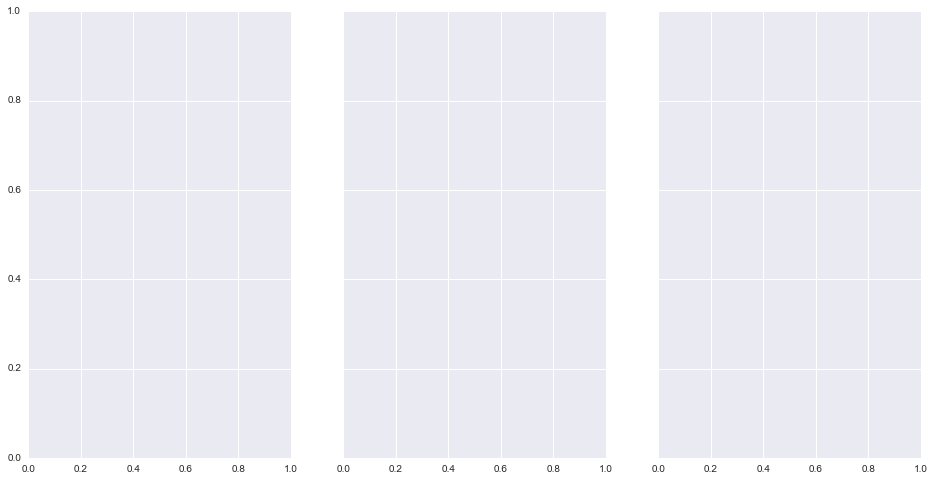

In [319]:
fig, axs = plt.subplots(1, 3, sharey=True)
train_years.plot(kind='scatter', x=X, y='Max_TempF', ax=axs[0], figsize=(16, 8))
train_years.plot(kind='scatter', x='Building_Conditions', y='Max_TempF', ax=axs[1])
train_years.plot(kind='scatter', x='Living_Conditions', y='Max_TempF', ax=axs[2])

In [289]:
#fig, axs = plt.subplots(1, 3, sharey=True)
#df_2014.plot(kind='scatter', x='Street_Sidewalk_Repair', y='Max_TempF', ax=axs[0], figsize=(16, 8))
#df_2014.plot(kind='scatter', x='Signal_Sign_Repair', y='Max_TempF', ax=axs[1])
#df_2014.plot(kind='scatter', x='General_Request', y='Max_TempF', ax=axs[2])

In [290]:
#fig, axs = plt.subplots(1, 3, sharey=True)
#df_2015.plot(kind='scatter', x='Parking_Enforcement', y='Max_TempF', ax=axs[0], figsize=(16, 8))
#df_2015.plot(kind='scatter', x='Building_Conditions', y='Max_TempF', ax=axs[1])
#df_2015.plot(kind='scatter', x='Living_Conditions', y='Max_TempF', ax=axs[2])

In [291]:
#fig, axs = plt.subplots(1, 3, sharey=True)
#df_2015.plot(kind='scatter', x='Street_Sidewalk_Repair', y='Max_TempF', ax=axs[0], figsize=(16, 8))
#df_2015.plot(kind='scatter', x='Signal_Sign_Repair', y='Max_TempF', ax=axs[1])
#df_2015.plot(kind='scatter', x='General_Request', y='Max_TempF', ax=axs[2])